In [1]:
from IPython.display import Audio
from scipy.io import wavfile
import glob
import numpy
import h5py
import os

In [2]:
wav_path = '/Tmp/sotelo/code/merlin/egs/slt_arctic/s1/slt_arctic_full_data/wav/'
label_path = '/Tmp/sotelo/code/merlin/egs/slt_arctic/s1/experiments/slt_arctic_full/acoustic_model/data/'
reg_label_path = '/Tmp/sotelo/code/merlin/egs/slt_arctic/s1/experiments/slt_arctic_full/acoustic_model/data/nn_no_silence_lab_norm_425/'
silence_pattern = '-sil+'

In [3]:
all_files = glob.glob(wav_path+'*.wav')
all_files = [x.split('/')[-1].split('.')[0] for x in all_files]
f

In [6]:
sample_file = 'arctic_b0537'
sample_wav = wav_path + sample_file + '.wav'
sample_label_phone = label_path + 'label_phone_align/' + sample_file + '.lab'
sample_label_state = label_path + 'label_state_align/' + sample_file + '.lab'

In [7]:
print sample_wav
print sample_label_phone
print sample_label_state

/Tmp/sotelo/code/merlin/egs/slt_arctic/s1/slt_arctic_full_data/wav/arctic_b0537.wav
/Tmp/sotelo/code/merlin/egs/slt_arctic/s1/experiments/slt_arctic_full/acoustic_model/data/label_phone_align/arctic_b0537.lab
/Tmp/sotelo/code/merlin/egs/slt_arctic/s1/experiments/slt_arctic_full/acoustic_model/data/label_state_align/arctic_b0537.lab


In [8]:
fs, wav_data = wavfile.read(sample_wav)
print "sampling rate: ", fs
print "length data: ", len(wav_data)
print "length in seconds: ", len(wav_data) / float(fs)
print "length in seconds/10000000: ", 10000000 * len(wav_data) / float(fs)

sampling rate:  16000
length data:  37041
length in seconds:  2.3150625
length in seconds/10000000:  23150625.0


In [9]:
with open(sample_label_phone) as file:
    data_phone = file.readlines()

print data_phone[0]
print data_phone[-1]

0 1700000 x^x-sil+sil=b@x_x/A:0_0_0/B:x-x-x@x-x&x-x#x-x$x-x!x-x;x-x|x/C:0+0+0/D:0_0/E:x+x@x+x&x+x#x+x/F:0_0/G:0_0/H:x=x@1=1|0/I:0=0/J:10+6-1

20900000 22950000 aa^n-sil+x=x@x_x/A:1_1_2/B:x-x-x@x-x&x-x#x-x$x-x!x-x;x-x|x/C:0+0+0/D:content_4/E:x+x@x+x&x+x#x+x/F:0_0/G:10_6/H:x=x@1=1|0/I:0=0/J:10+6-1



In [10]:
with open(sample_label_state) as file:
    data_state = file.readlines()

print data_state[0]
print data_state[1]
print data_state[2]
print data_state[-1]

0 50000 x^x-sil+sil=b@x_x/A:0_0_0/B:x-x-x@x-x&x-x#x-x$x-x!x-x;x-x|x/C:0+0+0/D:0_0/E:x+x@x+x&x+x#x+x/F:0_0/G:0_0/H:x=x@1=1|0/I:0=0/J:10+6-1[2]

50000 100000 x^x-sil+sil=b@x_x/A:0_0_0/B:x-x-x@x-x&x-x#x-x$x-x!x-x;x-x|x/C:0+0+0/D:0_0/E:x+x@x+x&x+x#x+x/F:0_0/G:0_0/H:x=x@1=1|0/I:0=0/J:10+6-1[3]

100000 200000 x^x-sil+sil=b@x_x/A:0_0_0/B:x-x-x@x-x&x-x#x-x$x-x!x-x;x-x|x/C:0+0+0/D:0_0/E:x+x@x+x&x+x#x+x/F:0_0/G:0_0/H:x=x@1=1|0/I:0=0/J:10+6-1[4]

22900000 22950000 aa^n-sil+x=x@x_x/A:1_1_2/B:x-x-x@x-x&x-x#x-x$x-x!x-x;x-x|x/C:0+0+0/D:content_4/E:x+x@x+x&x+x#x+x/F:0_0/G:10_6/H:x=x@1=1|0/I:0=0/J:10+6-1[6]



In [11]:
print 100 * len(wav_data) / float(fs) - 5, int(data_state[-1].split(' ')[1]) / 100000, 100 * len(wav_data) / float(fs)
print 100 * len(wav_data) / float(fs) - 5 <= int(data_state[-1].split(' ')[1]) / 100000
print int(data_state[-1].split(' ')[1]) / 100000 <= 100 * len(wav_data) / float(fs)
print data_state[-1].split(' ')[1] == data_phone[-1].split(' ')[1]

226.50625 229 231.50625
True
True
True


In [12]:
from io_funcs.binary_io import BinaryIOCollection
io_fun = BinaryIOCollection()
io_fun.load_binary_file(reg_label_path + sample_file + '.lab', 425).shape

(384, 425)

In [23]:
def compare_lengths(sample_file):
    sample_wav = wav_path + sample_file + '.wav'
    sample_label_phone = label_path + 'label_phone_align/' + sample_file + '.lab'
    sample_label_state = label_path + 'label_state_align/' + sample_file + '.lab'
    fs, wav_data = wavfile.read(sample_wav)
    
    with open(sample_label_phone) as file:
        data_phone = file.readlines()
    
    with open(sample_label_state) as file:
        data_state = file.readlines()
    
    print 100 * len(wav_data) / float(fs) - 5, int(data_state[-1].split(' ')[1]) / 100000, 100 * len(wav_data) / float(fs)
    assert 100 * len(wav_data) / float(fs) - 5 <= int(data_state[-1].split(' ')[1]) / 100000
    assert int(data_state[-1].split(' ')[1]) / 100000 <= 100 * len(wav_data) / float(fs)
    assert data_state[-1].split(' ')[1] == data_phone[-1].split(' ')[1]
    sil_phone = [silence_pattern in x for x in data_phone]
    sil_state = [silence_pattern in x for x in data_state]
    assert sil_phone[0]
    assert sil_phone[-1]
    assert not numpy.any(sil_phone[1:-1])
    
    assert numpy.all(sil_state[:5])
    assert numpy.all(sil_state[-5:])
    
    assert not numpy.any(sil_state[5:-5])
    
    
    breaks_phone = [int(x.split(' ')[0]) for x in data_phone] + [int(data_phone[-1].split(' ')[1])]
    breaks_state = [int(x.split(' ')[0]) for x in data_state] + [int(data_state[-1].split(' ')[1])]
    breaks_phone = [x/625 for x in breaks_phone]
    breaks_state = [x/625 for x in breaks_state]
    
    start = breaks_phone[1]
    end = breaks_phone[-1-1]
    wav_data = wav_data[start:end]
    return wav_data

In [25]:
compare_lengths(sample_file).shape

226.50625 229 231.50625


(30720,)

In [14]:
# for sample_file in all_files:
#     print sample_file
#     compare_lengths(sample_file)

In [14]:
[x.split('=')[0] for x in data_state]

['0 50000 x^x-sil+sil',
 '50000 100000 x^x-sil+sil',
 '100000 200000 x^x-sil+sil',
 '200000 1500000 x^x-sil+sil',
 '1500000 1700000 x^x-sil+sil',
 '1700000 1750000 sil^sil-b+ah',
 '1750000 1800000 sil^sil-b+ah',
 '1800000 1900000 sil^sil-b+ah',
 '1900000 2050000 sil^sil-b+ah',
 '2050000 2100000 sil^sil-b+ah',
 '2100000 2150000 sil^b-ah+t',
 '2150000 2200000 sil^b-ah+t',
 '2200000 2250000 sil^b-ah+t',
 '2250000 2450000 sil^b-ah+t',
 '2450000 2500000 sil^b-ah+t',
 '2500000 2800000 b^ah-t+sh',
 '2800000 2850000 b^ah-t+sh',
 '2850000 3200000 b^ah-t+sh',
 '3200000 3250000 b^ah-t+sh',
 '3250000 3300000 b^ah-t+sh',
 '3300000 3350000 ah^t-sh+iy',
 '3350000 3650000 ah^t-sh+iy',
 '3650000 4250000 ah^t-sh+iy',
 '4250000 4450000 ah^t-sh+iy',
 '4450000 4550000 ah^t-sh+iy',
 '4550000 4750000 t^sh-iy+hh',
 '4750000 4950000 t^sh-iy+hh',
 '4950000 5500000 t^sh-iy+hh',
 '5500000 5650000 t^sh-iy+hh',
 '5650000 5700000 t^sh-iy+hh',
 '5700000 5750000 sh^iy-hh+ae',
 '5750000 5800000 sh^iy-hh+ae',
 '5800000 

In [15]:
[x.split('=')[0] for x in data_phone]

['0 1700000 x^x-sil+sil',
 '1700000 2100000 sil^sil-b+ah',
 '2100000 2500000 sil^b-ah+t',
 '2500000 3300000 b^ah-t+sh',
 '3300000 4550000 ah^t-sh+iy',
 '4550000 5700000 t^sh-iy+hh',
 '5700000 6300000 sh^iy-hh+ae',
 '6300000 6750000 iy^hh-ae+d',
 '6750000 7400000 hh^ae-d+b',
 '7400000 7850000 ae^d-b+ih',
 '7850000 8150000 d^b-ih+k',
 '8150000 9450000 b^ih-k+ah',
 '9450000 10800000 ih^k-ah+m',
 '10800000 11600000 k^ah-m+ae',
 '11600000 11850000 ah^m-ae+n',
 '11850000 12500000 m^ae-n+ao',
 '12500000 13400000 ae^n-ao+t',
 '13400000 14650000 n^ao-t+aa',
 '14650000 15850000 ao^t-aa+m',
 '15850000 16400000 t^aa-m+ax',
 '16400000 16700000 aa^m-ax+t',
 '16700000 17950000 m^ax-t+aa',
 '17950000 19900000 ax^t-aa+n',
 '19900000 20900000 t^aa-n+sil',
 '20900000 22950000 aa^n-sil+x']

In [16]:
breaks_phone = [int(x.split(' ')[0]) for x in data_phone] + [int(data_phone[-1].split(' ')[1])]
breaks_state = [int(x.split(' ')[0]) for x in data_state] + [int(data_state[-1].split(' ')[1])]
breaks_phone = [x/625 for x in breaks_phone]
breaks_state = [x/625 for x in breaks_state]

In [17]:
Audio(data=wav_data, rate = 16000)


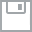
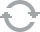
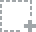
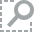
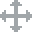
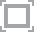
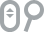
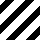
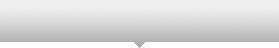
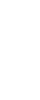
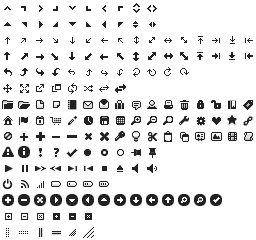
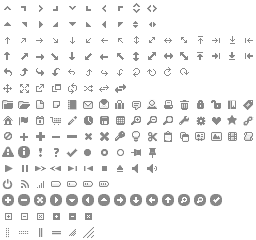
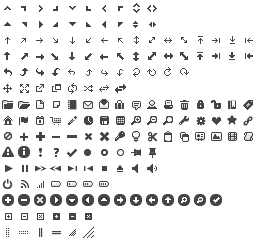
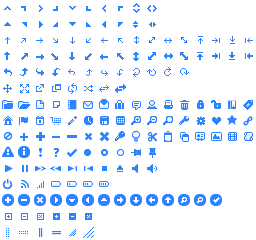
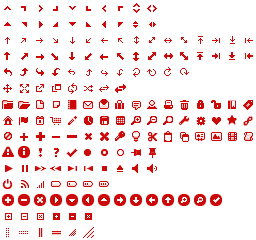
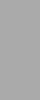
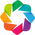
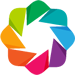

In [18]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

In [19]:
fig = figure(width=1000, height=200)
fig.line(range(len(wav_data)), wav_data, line_width=1)

fig.ray(x=breaks_state, y=-25000, length=30000, angle=90,
      angle_units="deg", color="#000000", line_width=1)

fig.ray(x=breaks_phone, y=-25000, length=30000, angle=90,
      angle_units="deg", color="#FB8072", line_width=2)

show(fig)

In [20]:
print breaks_phone[1], breaks_phone[-1-1]
print breaks_state[5], breaks_state[-1-5]
start = breaks_phone[1]
end = breaks_phone[-1-1]

2720 33440
2720 33440


In [21]:
wav_data = wav_data[start:end]
breaks_phone = [x - start for x in breaks_phone[1:-1]]
breaks_state = [x - start for x in breaks_state[5:-6]]

fig = figure(width=1000, height=200)
fig.line(range(len(wav_data)), wav_data, line_width=1)

fig.ray(x=breaks_state, y=-25000, length=30000, angle=90,
      angle_units="deg", color="#000000", line_width=1)

fig.ray(x=breaks_phone, y=-25000, length=30000, angle=90,
      angle_units="deg", color="#FB8072", line_width=2)

show(fig)

In [26]:
all_wav_data = []
for file in all_files:
    all_wav_data.append(compare_lengths(file))

330.5 333 335.5
370.5 373 375.5
315.50625 318 320.50625
245.50625 248 250.50625
143.50625 146 148.50625
291.50625 294 296.50625
295.50625 298 300.50625
223.5 226 228.5
304.5 307 309.5
296.50625 299 301.50625
300.50625 303 305.50625
278.5 281 283.5
347.50625 350 352.50625
284.50625 287 289.50625
182.50625 185 187.50625
352.50625 355 357.50625
397.50625 400 402.50625
155.50625 158 160.50625
342.50625 345 347.50625
306.50625 309 311.50625
245.50625 248 250.50625
425.50625 428 430.50625
474.50625 477 479.50625
390.50625 393 395.50625
304.5 307 309.5
283.50625 286 288.50625
404.50625 407 409.50625
234.50625 237 239.50625
303.5 306 308.5
142.50625 145 147.50625
196.50625 199 201.50625
368.50625 371 373.50625
362.50625 365 367.50625
320.50625 323 325.50625
368.50625 371 373.50625
175.50625 178 180.50625
235.50625 238 240.50625
181.50625 184 186.50625
262.50625 265 267.50625
257.5 260 262.5
233.50625 236 238.50625
271.50625 274 276.50625
341.50625 344 346.50625
301.5 304 306.5
250.50625 253 25

In [52]:
all_wav_data = numpy.array(all_wav_data)
numpy.save('/Tmp/sotelo/data/arctic/all_arctic.npy', all_wav_data)
numpy.save('/Tmp/sotelo/data/arctic/arctic_train.npy', all_wav_data[:1000])
numpy.save('/Tmp/sotelo/data/arctic/arctic_valid.npy', all_wav_data[1000:1066])
numpy.save('/Tmp/sotelo/data/arctic/arctic_test.npy', all_wav_data[1066:])

In [56]:
numpy.array([len(x) for x in all_wav_data]).max()

78160

In [58]:
all_labels_data = []
for file_name in all_files:
    all_labels_data.append(io_fun.load_binary_file(reg_label_path + file_name + '.lab', 425))

In [67]:
all_labels_data = numpy.array(all_labels_data)
numpy.save('/Tmp/sotelo/data/arctic/all_labels_arctic.npy', all_labels_data)
numpy.save('/Tmp/sotelo/data/arctic/arctic_labels_train.npy', all_labels_data[:1000])
numpy.save('/Tmp/sotelo/data/arctic/arctic_labels_valid.npy', all_labels_data[1000:1066])
numpy.save('/Tmp/sotelo/data/arctic/arctic_labels_test.npy', all_labels_data[1066:])

In [ ]:
expanded_labels = numpy.array([ numpy.repeat(x, 80, 0) for x in all_labels_data])

In [24]:
Audio(wav_data, rate = 16000)

In [240]:
def __normalize(data):
    data = data.astype('float32')
    data -= data.min(axis=1)[:, None]
    data /= data.max(axis=1)[:, None]
    return data


def __linear_quantize(data, q_levels):
    eps = numpy.float64(1e-5)
    data *= (q_levels - eps)
    data += eps/2
    data = data.astype('int32')
    return data

def linear2mu(x, mu=255):
    x_mu = np.sign(x) * np.log(1 + mu*np.abs(x))/np.log(1 + mu)
    return ((x_mu + 1)/2 * mu).astype('int16')

def mu2linear(x, mu=255):
    mu = float(mu)
    x = x.astype('float32')
    y = 2. * (x - (mu+1.)/2.) / (mu+1.)
    return np.sign(y) * (1./mu) * ((1. + mu)**np.abs(y) - 1.)

def __mu_law_quantize(data):
    return linear2mu(data)

def __batch_quantize(data, q_levels, q_type):
    data = data.astype('float64')
    data = __normalize(data)
    if q_type == 'linear':
        return __linear_quantize(data, q_levels)
    if q_type == 'a-law':
        return __a_law_quantize(data)
    if q_type == 'mu-law':
        # from [0, 1] to [-1, 1]
        data = 2.*data-1.
        # Automatically quantized to 256 bins.
        return __mu_law_quantize(data)
    raise NotImplementedError

In [232]:
wav_data = wav_data.reshape(-1, wav_data.size)
norm_wav_data = __normalize(wav_data)
mu_quantized_data = __batch_quantize(wav_data, 256, 'mu-law')
lin_quantized_data = __batch_quantize(wav_data, 256, 'linear')
mu_reconstructed_data = mu2linear(quantized_data)
norm_mu_rec_data = __normalize(mu_reconstructed_data)
norm_lin_rec_data = __normalize(lin_quantized_data)

In [216]:
import numpy as np

In [233]:
Audio(wav_data[0], rate = 16000)

In [234]:
Audio(norm_wav_data[0], rate = 16000)

In [235]:
Audio(mu_quantized_data[0], rate = 16000)

In [236]:
Audio(lin_quantized_data[0], rate = 16000)

In [237]:
Audio(mu_reconstructed_data[0], rate = 16000)

In [238]:
Audio(norm_mu_rec_data[0], rate = 16000)

In [239]:
Audio(norm_lin_rec_data[0], rate = 16000)